# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_03ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,ixterm-00001-00002,"['--disable-ansi-color', '--disable-direct-col...",8.0595,2468160
1,1,ixterm-00001-00003,"['--disable-ansi-color', '--disable-direct-col...",11.4715,3202648
2,2,ixterm-00001-00004,"['--disable-ansi-color', '--disable-direct-col...",11.1620,3344192
3,3,ixterm-00001-00005,"['--disable-16-color', '--disable-256-color', ...",11.6775,3456200
4,4,ixterm-00001-00006,"['--disable-ansi-color', '--disable-16-color',...",9.9710,3015768
...,...,...,...,...,...
375,375,ixterm-00020-00015,"['--disable-active-icon', '--disable-16-color'...",10.1740,3057856
376,376,ixterm-00020-00016,"['--disable-ansi-color', '--disable-direct-col...",9.6670,2862200
377,377,ixterm-00020-00017,"['--disable-16-color', '--disable-256-color', ...",7.5530,2393760
378,378,ixterm-00020-00018,"['--disable-active-icon', '--disable-16-color'...",8.5090,2739752


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,ixterm-00001-00002,"['--disable-ansi-color', '--disable-direct-col...",8.0595,2468160,ixterm,00001,00002
1,1,ixterm-00001-00003,"['--disable-ansi-color', '--disable-direct-col...",11.4715,3202648,ixterm,00001,00003
2,2,ixterm-00001-00004,"['--disable-ansi-color', '--disable-direct-col...",11.1620,3344192,ixterm,00001,00004
3,3,ixterm-00001-00005,"['--disable-16-color', '--disable-256-color', ...",11.6775,3456200,ixterm,00001,00005
4,4,ixterm-00001-00006,"['--disable-ansi-color', '--disable-16-color',...",9.9710,3015768,ixterm,00001,00006
...,...,...,...,...,...,...,...,...
375,375,ixterm-00020-00015,"['--disable-active-icon', '--disable-16-color'...",10.1740,3057856,ixterm,00020,00015
376,376,ixterm-00020-00016,"['--disable-ansi-color', '--disable-direct-col...",9.6670,2862200,ixterm,00020,00016
377,377,ixterm-00020-00017,"['--disable-16-color', '--disable-256-color', ...",7.5530,2393760,ixterm,00020,00017
378,378,ixterm-00020-00018,"['--disable-active-icon', '--disable-16-color'...",8.5090,2739752,ixterm,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN   8.4240   8.4220   8.4615   8.9875   9.0105   8.5960   
00002     8.0595      NaN   8.0985   8.2290   8.5885   8.7700   8.2465   
00003    11.4715  11.4885      NaN  11.4930  12.2885  12.2480  11.7020   
00004    11.1620  11.1345  11.2070      NaN  11.7165  11.9380  11.3855   
00005    11.6775  11.6790  11.6880  11.7065      NaN  12.5075  11.8620   
00006     9.9710   9.8340   9.8305   9.8920   9.9720      NaN  10.3960   
00007     9.5675   9.5570   9.5655   9.5775   9.9995  10.2370      NaN   
00008     9.7360   9.7850   9.9825   9.7705  10.3760  10.4100   9.9210   
00009    11.4265  11.4385  11.4535  11.4380  12.1395  12.0730  11.6025   
00010    10.6005  10.5935  10.6585  10.6200  11.4160  11.2990  10.8370   
00011     9.6985   9.7005   9.7210   9.6790  10.4105  10.3370   9.8470   
00012     8.9610   8.9400   8.9860   9.0010   9.3215   9.5375   9.4640   
00013    10.0135  10.0550  10.0435  10.3760  10.7380  10.6660  10.1700   
00014     8.7230   8.7360   8.7665   8.7730   9.1175   9.3440   8.9665   
00015    10.2870  10.1100  10.1555  10.1545  10.2795  10.8065  10.8050   
00016     9.6505   9.6820   9.6740  10.4590  10.3780  10.3580   9.8775   
00017     7.5065   7.5800   7.5595   7.5120   7.8570   8.0275   7.6190   
00018     8.4890   8.5265   8.5330   8.7000   9.0810   9.0670   8.6640   
00019    11.6560  11.7055  11.6945  11.7880  12.9985  12.4800  11.9585   
00020    10.7545  10.7240  10.7625  10.7955  11.6110  11.4765  10.9005   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001   8.5380   8.6270   8.4300   8.7945   8.8665   8.8690   8.4920   8.4710   
00002   8.2065   8.1325   8.1365   8.4935   8.4220   8.4530   8.1115   8.1265   
00003  11.6650  11.5235  11.4310  12.0355  12.0155  12.0280  11.5450  11.5270   
00004  11.3565  11.4095  11.2120  11.6240  11.8255  11.7535  11.1910  11.1895   
00005  11.9700  11.9245  11.7515  12.1580  12.2665  12.2150  12.4665  11.7285   
00006  10.0660  10.0510   9.8915   9.9895  10.2660  10.2950  10.3890   9.8880   
00007   9.7110   9.7660   9.5685  10.0310  10.0695  10.0835   9.6195   9.6215   
00008      NaN   9.9615   9.7910  10.2175  10.2865  10.2020   9.8375   9.9695   
00009  11.7115      NaN  11.4380  11.9230  11.9490  11.9825  11.4940  11.4850   
00010  10.7730  10.7895      NaN  11.0920  11.1290  11.1430  10.7110  10.6640   
00011   9.8065  10.0285   9.7535      NaN  10.0910  10.1420   9.7030   9.6960   
00012   9.0805   9.0880   8.9930   9.3015      NaN   9.4675   9.5285   8.9795   
00013  10.3010  10.1470  10.0245  10.4845  10.4785      NaN  10.0865  10.1095   
00014   8.9025   8.8945   8.7620   9.0825   9.1435   9.1385      NaN   8.7525   
00015  10.2885  10.3110  10.1880  10.5480  10.7080  10.6875  10.7550      NaN   
00016   9.8615   9.7595   9.6850  10.1390  10.1140  10.2615   9.7145   9.7165   
00017   7.6320   7.6710   7.5560   7.8105   7.8805   7.8865   7.5450   7.5005   
00018   8.6775   8.5350   8.7185   8.9190   8.9015   8.9390   8.5420   8.5490   
00019  11.9185  11.9070  11.7190  12.2725  12.2310  12.2060  11.7525  11.7585   
00020  10.9045  10.9105  10.7895  11.2005  11.2710  11.2930  10.9155  10.7700   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001   8.4730   8.4530   8.4375   8.4835   8.4455  
00002   8.1360   8.1105   8.1190   8.1425   8.0870  
00003  11.5225  11.4940  11.4845  11.5340  11.4980  
00004  11.1955  11.2195  11.1395  11.1600  11.2125  
00005  11.7090  11.6920  11.7075  11.6965  11.6845  
00006   9.8815 

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00003)"
00002,"(Build Time, 00001)"
00003,"(Build Time, 00010)"
00004,"(Build Time, 00002)"
00005,"(Build Time, 00001)"
00006,"(Build Time, 00003)"
00007,"(Build Time, 00002)"
00008,"(Build Time, 00001)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002   2468160.0        NaN  2468160.0  2468160.0  2468160.0  2468160.0   
00003   3202648.0  3202648.0        NaN  3202648.0  3202648.0  3202648.0   
00004   3344192.0  3344192.0  3344192.0        NaN  3344192.0  3344192.0   
00005   3456200.0  3456200.0  3456200.0  3456200.0        NaN  3456200.0   
00006   3015768.0  3015768.0  3015768.0  3015768.0  3015768.0        NaN   
00007   2857160.0  2857160.0  2857160.0  2857160.0  2857160.0  2857160.0   
00008   2902288.0  2902288.0  2902288.0  2902288.0  2902288.0  2902288.0   
00009   3218472.0  3218472.0  3218472.0  3218472.0  3218472.0  3218472.0   
00010   3023648.0  3023648.0  3023648.0  3023648.0  3023648.0  3023648.0   
00011   2904408.0  2904408.0  2904408.0  2904408.0  2904408.0  2904408.0   
00012   2883584.0  2883584.0  2883584.0  2883584.0  2883584.0  2883584.0   
00013   3015848.0  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0   
00014   2743048.0  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0   
00015   3057856.0  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0   
00016   2862200.0  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0   
00017   2393760.0  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0   
00018   2739752.0  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0   
00019   3295512.0  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0   
00020   3034008.0  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0   
00003  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0   
00004  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0   
00005  3456200.0  3456200.0  3456200.0  3456200.0  3456200.0  3456200.0   
00006  3015768.0  3015768.0  3015768.0  3015768.0  3015768.0  3015768.0   
00007        NaN  2857160.0  2857160.0  2857160.0  2857160.0  2857160.0   
00008  2902288.0        NaN  2902288.0  2902288.0  2902288.0  2902288.0   
00009  3218472.0  3218472.0        NaN  3218472.0  3218472.0  3218472.0   
00010  3023648.0  3023648.0  3023648.0        NaN  3023648.0  3023648.0   
00011  2904408.0  2904408.0  2904408.0  2904408.0        NaN  2904408.0   
00012  2883584.0  2883584.0  2883584.0  2883584.0  2883584.0        NaN   
00013  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0   
00014  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0   
00015  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0   
00016  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0   
00017  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0   
00018  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0   
00019  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0   
00020  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0   
00003  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0   
00004  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0   
00005 

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,9.0105,8.593789,8.4220
00002,8.7700,8.245737,8.0595
00003,12.2885,11.683947,11.4310
00004,11.9380,11.370105,11.1345
00005,12.5075,11.899500,11.6775
00006,10.3960,10.004868,9.8305
00007,10.2370,9.743974,9.5570
00008,10.4100,9.955368,9.7360


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00005,12.5075,11.899500,11.6775
00019,12.9985,11.937632,11.6560
00003,12.2885,11.683947,11.4310
00009,12.1395,11.632263,11.4185
00004,11.9380,11.370105,11.1345
00020,11.6110,10.958842,10.7240
00010,11.4160,10.819658,10.5935
00015,10.8065,10.364237,10.1100


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

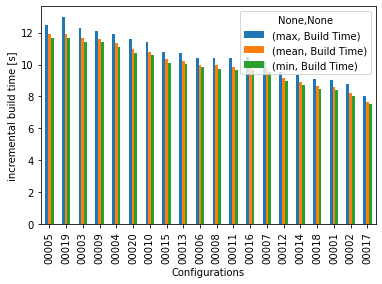

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

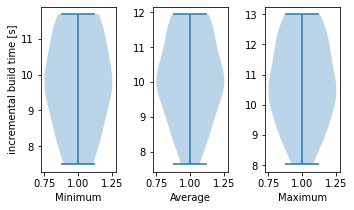

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,8.4240,8.4220,8.4615,8.9875,9.0105,8.5960,8.5380,8.6270,8.4300,8.7945,8.8665,8.8690,8.4920,8.4710,8.4730,8.4530,8.4375,8.4835,8.4455
00002,8.0595,NaN,8.0985,8.2290,8.5885,8.7700,8.2465,8.2065,8.1325,8.1365,8.4935,8.4220,8.4530,8.1115,8.1265,8.1360,8.1105,8.1190,8.1425,8.0870
00003,11.4715,11.4885,NaN,11.4930,12.2885,12.2480,11.7020,11.6650,11.5235,11.4310,12.0355,12.0155,12.0280,11.5450,11.5270,11.5225,11.4940,11.4845,11.5340,11.4980
00004,11.1620,11.1345,11.2070,NaN,11.7165,11.9380,11.3855,11.3565,11.4095,11.2120,11.6240,11.8255,11.7535,11.1910,11.1895,11.1955,11.2195,11.1395,11.1600,11.2125
00005,11.6775,11.6790,11.6880,11.7065,NaN,12.5075,11.8620,11.9700,11.9245,11.7515,12.1580,12.2665,12.2150,12.4665,11.7285,11.7090,11.6920,11.7075,11.6965,11.6845
00006,9.9710,9.8340,9.8305,9.8920,9.9720,NaN,10.3960,10.0660,10.0510,9.8915,9.9895,10.2660,10.2950,10.3890,9.8880,9.8815,9.9020,9.8605,9.8470,9.8700
00007,9.5675,9.5570,9.5655,9.5775,9.9995,10.2370,NaN,9.7110,9.7660,9.5685,10.0310,10.0695,10.0835,9.6195,9.6215,9.5790,9.6500,9.5710,9.7225,9.6385
00008,9.7360,9.7850,9.9825,9.7705,10.3760,10.4100,9.9210,NaN,9.9615,9.7910,10.2175,10.2865,10.2020,9.8375,9.9695,9.7600,9.7895,9.7665,9.7930,9.7965
00009,11.4265,11.4385,11.4535,11.4380,12.1395,12.0730,11.6025,11.7115,NaN,11.4380,11.9230,11.9490,11.9825,11.4940,11.4850,11.4735,11.5930,11.4185,11.4495,11.5240
